In [1]:
import pandas as pd # Use the work with the data 2frames
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates


In [7]:
tp_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data 2/lighthouse/Texas Point/TexasPoint_1993-2000_pwl_harmwl_bwl.csv')
tp_9300_LH.drop(labels=range(len(tp_9300_LH)-6,len(tp_9300_LH)), axis=0, inplace=True)
tp_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data 2/lighthouse/Texas Point/TexasPoint_2001-2012_pwl_harmwl_bwl.csv')
tp_0112_LH.drop(labels=range(len(tp_0112_LH)-6,len(tp_0112_LH)), axis=0, inplace=True)
tp_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data 2/lighthouse/Texas Point/TexasPoint_2013-2023_pwl_harmwl_bwl.csv')
tp_1323_LH.drop(labels=range(len(tp_1323_LH)-6,len(tp_1323_LH)), axis=0, inplace=True)
directory_path = '/Users/rprocious/Downloads/data 2/NOAA/texasPoint/'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

tp_NOAA = pd.concat(dataframes, ignore_index=True)
tp_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
tp_NOAA.reset_index(drop = True, inplace=True)
frames = [tp_9300_LH,tp_0112_LH,tp_1323_LH]
tp_LH = pd.concat(frames, ignore_index=True)
tp_LH.drop(labels=range(0,262800),axis=0, inplace=True)
tp_LH.reset_index(drop=True, inplace=True)

comparison_df = pd.DataFrame()
comparison_df['Dates'] = tp_LH['#date+time']
comparison_df['Lighthouse WL'] = tp_LH['126-pwl']
comparison_df['NOAA WL'] = tp_NOAA[' Water Level']

comparison_df['Dates'] = pd.to_datetime(comparison_df['Dates'])
comparison_df['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['Lighthouse WL'] = pd.to_numeric(comparison_df['Lighthouse WL'],errors= 'coerce')
comparison_df['NOAA WL'] = pd.to_numeric(comparison_df['NOAA WL'],errors='coerce')
comparison_df


/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_57144/369914491.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  tp_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data 2/lighthouse/Texas Point/TexasPoint_2001-2012_pwl_harmwl_bwl.csv')
/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_57144/369914491.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  tp_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data 2/lighthouse/Texas Point/TexasPoint_2013-2023_pwl_harmwl_bwl.csv')


,Dates,Lighthouse WL,NOAA WL
0,2002-05-26 15:00:00,NaN,NaN
1,2002-05-26 15:06:00,NaN,NaN
2,2002-05-26 15:12:00,NaN,NaN
3,2002-05-26 15:18:00,NaN,NaN
4,2002-05-26 15:24:00,NaN,NaN
...,...,...,...
280633,2015-03-15 08:30:00,NaN,1.287
280634,2015-03-15 08:36:00,NaN,1.283
280635,2015-03-15 08:42:00,NaN,1.265
280636,2015-03-15 08:48:00,NaN,1.257


In [29]:
#function to find the index of a date range
def date_index_locater(start_date,end_date):
    indices = []
# Filter rows by date range
    date_range_filter = (comparison_df['Dates'] >= start_date) & (comparison_df['Dates'] <= end_date)

# Get the indices of the rows within the date range
    indices = (comparison_df[date_range_filter].index.tolist())

    return(indices)


Text(0.5, 1.0, 'Texas Point')

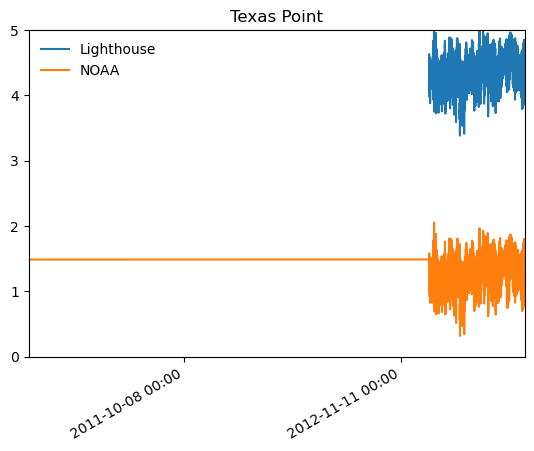

In [36]:
plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(0,5)

start_date = pd.to_datetime('2010-12-25 12:00')

end_date = pd.to_datetime('2013-06-25 17:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Texas Point')

In [30]:
date_index_locater('2013-01-01 00:00','2013-01-01 01:00')

[87828, 87829, 87830, 87831, 87832, 87833, 87834, 87835, 87836, 87837, 87838]

In [33]:
comparison_df['Differences'] = comparison_df['Lighthouse WL'] - comparison_df['NOAA WL']
comparison_df[87825:87840]

,Dates,Lighthouse WL,NOAA WL,Differences
87825,2003-05-27 13:30:00,NaN,1.430,NaN
87826,2003-05-27 13:36:00,NaN,1.456,NaN
87827,2003-05-27 13:42:00,NaN,1.481,NaN
87828,2013-01-01 00:00:00,4.620,1.487,3.133
87829,2013-01-01 00:06:00,4.622,1.500,3.122
87830,2013-01-01 00:12:00,4.631,1.489,3.142
87831,2013-01-01 00:18:00,4.626,1.493,3.133
87832,2013-01-01 00:24:00,4.626,1.499,3.127
87833,2013-01-01 00:30:00,4.618,1.507,3.111
87834,2013-01-01 00:36:00,4.615,1.519,3.096
